# **Problem Statement:** Analysis Of Data With Moving Average

In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

Import Succesfull


* **Creating Function fro setting date as index**

In [2]:
def parse(x):
    return datetime.strptime(x,'%m/%d/%Y')


In [3]:
# reading datasets
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',  parse_dates=['Bill_Date'], date_parser=parse)

In [4]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [5]:
df.describe()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,232.811321,1089.292453,175.957170,194.535094,30.207547
std,106.888162,411.011878,67.797382,68.951708,1.974438
min,63.000000,245.700000,37.800000,77.810000,25.000000
25%,147.000000,777.000000,128.120000,145.460000,29.000000
50%,211.000000,1103.000000,181.850000,193.490000,31.000000
75%,316.000000,1353.300000,218.870000,244.030000,31.000000
max,501.000000,2139.000000,371.610000,403.890000,34.000000


In [6]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 53
Columns  : 6

 Features 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

 Missing Values 
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

 Unique Values 
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [7]:
# setiing date as index
bill_df=df.set_index('Bill_Date')

In [8]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [9]:
# extracting 3 year data
bill_2018=bill_df['2016':'2018'][['Billed_amount']] # selecting one feature that is billed amount 

In [10]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [11]:
bill_2018.shape

(36, 1)

# 1. Simple Moving Average


* **A simple moving average (SMA) is a technical analysis indicator that calculates the average price of a security over a specified period of time. The SMA is calculated by adding up the closing prices of a security over a specified number of periods and then dividing the total by the number of periods.**

* **For example, a 5-day SMA would calculate the average price of a security over the past 5 days. The SMA is then plotted on a chart, and can be used to identify trends and support and resistance levels.**

* **SMAs are often used by traders to identify trends and to make trading decisions. For example, if a security's price is above its SMA, it is considered to be in an uptrend. If the price falls below the SMA, it is considered to be in a downtrend.**

* **SMAs can also be used to identify support and resistance levels. Support levels are areas where the price of a security is likely to find support from buyers. Resistance levels are areas where the price of a security is likely to find resistance from sellers.**

* **SMAs are a simple and effective technical analysis indicator that can be used to identify trends, support and resistance levels, and to make trading decisions.**

* **Here are some of the benefits of using SMAs:**

* They are easy to calculate and interpret.
* They can be used to identify trends and support and resistance levels.
* They can be used to make trading decisions.

* **Here are some of the limitations of using SMAs:**
* They are lagging indicators, which means that they lag behind the actual price of the security.
* They are not always accurate, and can be fooled by false signals.
* They can be used by other traders to make trading decisions, which can lead to increased volatility.
* **Overall, SMAs are a useful technical analysis indicator that can be used to identify trends, support and resistance levels, and to make trading decisions. However, it is important to remember that they are not always accurate, and should be used in conjunction with other technical analysis indicators.**

* **SMA = (sum of closing prices over n periods) / n**

In [12]:
# 
#calculates the rolling mean of the Billed_amount column in 
# the bill_2018 DataFrame. 
# The rolling mean is a moving average that calculates
# the average of a group of values, with the group size specified by the
# window argument. In this case, the window argument is set to 3,
# so the rolling mean will calculate the average of 3 consecutive values.


bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [13]:
# merging above result
bill_2018['ma_rolling_3']= bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [14]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


* **Above data set approx cathing original dataset**

In [16]:
plt.style.use('dark_background')

<AxesSubplot: xlabel='Bill_Date'>

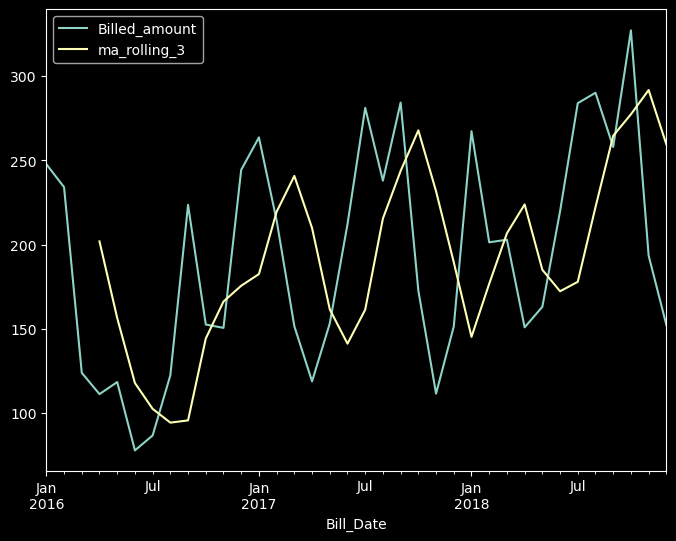

In [17]:
bill_2018.plot()

# 2. Weighted Moving Average

* The weighted moving average (WMA) is a technical analysis indicator that calculates the average price of a security over a specified period of time, but assigns a greater weighting to the most recent data points. The WMA is calculated by multiplying each number in the data set by a predetermined weight and summing up the resulting values. Traders use weighting moving average to generate trade signals, to indicate when to buy or sell stocks.

* *WMA = (sum of closing prices over n periods) * (weight of most recent data point) / (sum of weights)**

where:

* WMA is the weighted moving average
* n is the number of periods
* sum of closing prices over n periods is the sum of the closing prices of a security over a specified number of periods
* weight of most recent data point is the weight assigned to the most recent data point
* sum of weights is the sum of all the weights
* For example, to calculate a 5-day WMA with weights of 0.2, 0.1, 0.1, 0.1, and 0.5, you would add up the closing prices of a security over the past 5 days and then multiply the total by 0.2 and divide by 2.

* The weighted moving average can be used to identify trends and support and resistance levels. A security's price is considered to be in an uptrend if it is above its WMA, and in a downtrend if it is below its WMA. Support levels are areas where the price of a security is likely to find support from buyers, and resistance levels are areas where the price of a security is likely to find resistance from sellers.

* The weighted moving average is a more sophisticated technical analysis indicator than the simple moving average. It can be used to identify trends more accurately, and it can also be used to identify support and resistance levels more accurately. However, the weighted moving average is also more complex to calculate and interpret.

* Here are some of the benefits of using WMAs:

* They can be used to identify trends more accurately than simple moving averages.
* They can be used to identify support and resistance levels more accurately than simple moving averages.
* They can be used to make trading decisions.

* Here are some of the limitations of using WMAs:
* They are more complex to calculate and interpret than simple moving averages.
* They are not always accurate, and can be fooled by false signals.
* They can be used by other traders to make trading decisions, which can lead to increased volatility.
* Overall, WMAs are a useful technical analysis indicator that can be used to identify trends, support and resistance levels, and to make trading decisions. However, it is important to remember that they are not always accurate, and should be used in conjunction with other technical analysis indicators.

In [18]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [19]:
#The weights should add up to the window value
bill_2018['wma_rolling_3']= bill_2018['Billed_amount'].rolling(window = 3).apply(wma(np.array([0.5,1,1.5]))).shift(3)

In [20]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,NaN
2016-05-01,118.37,156.393333,NaN
2016-06-01,77.81,117.813333,181.250000
2016-07-01,86.67,102.466667,135.911667
2016-08-01,122.40,94.283333,116.900000
2016-09-01,223.62,95.626667,96.898333


<AxesSubplot: xlabel='Bill_Date'>

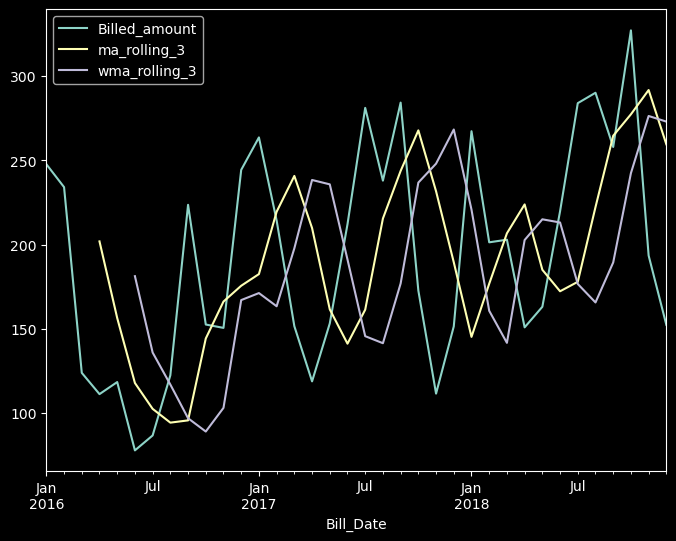

In [21]:
bill_2018.plot()

# 3. Exponential Moving Average

* The exponential moving average (EMA) is a technical analysis indicator that calculates the average price of a security over a specified period of time, but assigns a greater weighting to the most recent data points. The EMA is calculated by multiplying each number in the data set by a predetermined weight and summing up the resulting values. Traders use exponential moving average to generate trade signals, to indicate when to buy or sell stocks.

The mathematical formula for an exponential moving average is as follows:
* **EMA = (closing price * EMA multiplier) + (previous EMA * (1 - EMA multiplier))**

where:

* EMA is the exponential moving average
* closing price is the closing price of a security on a given day
* EMA multiplier is a constant that determines the weighting of the most recent data point. The EMA multiplier is typically between 0 and 1, with a higher value giving more weight to the most recent data point.
* previous EMA is the exponential moving average from the previous day


In [27]:
# span=3 days
bill_2018['ewm_window_3']= bill_2018['Billed_amount'].ewm(span = 3,adjust = False,min_periods = 0).mean().shift(1)

In [23]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,NaN,182.385000
2016-05-01,118.37,156.393333,NaN,146.802500
2016-06-01,77.81,117.813333,181.250000,132.586250
2016-07-01,86.67,102.466667,135.911667,105.198125
2016-08-01,122.40,94.283333,116.900000,95.934063
2016-09-01,223.62,95.626667,96.898333,109.167031


<AxesSubplot: xlabel='Bill_Date'>

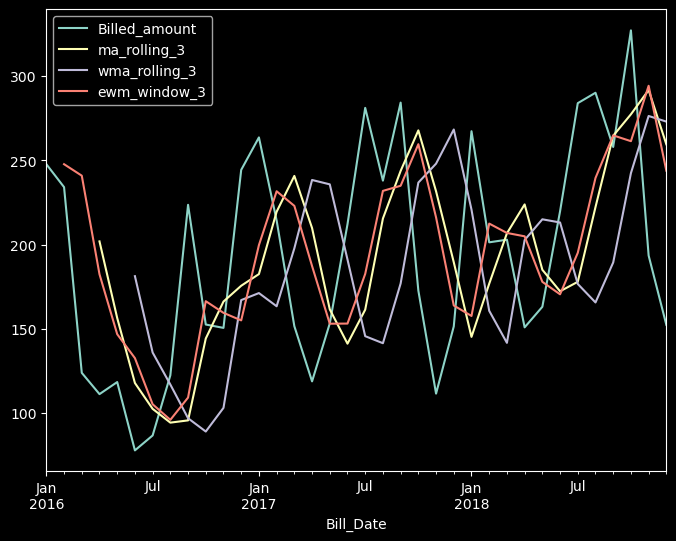

In [24]:
bill_2018.plot()

# 4. Exponential Smoothing

* Exponential smoothing is a forecasting method that uses weighted averages of past observations to predict future values. The weights are assigned in such a way that more recent observations are given more weight than older observations. This is done because it is assumed that the future is more likely to be similar to the recent past than to the distant past.

* There are two main types of exponential smoothing: single exponential smoothing and double exponential smoothing. Single exponential smoothing uses a single smoothing constant to weight the observations, while double exponential smoothing uses two smoothing constants to weight the observations and a trend component.

* The mathematical formula for single exponential smoothing is as follows:
* **Ft = α * Yt + (1 - α) * Ft-1**

where:

* Ft is the forecast for time period t
* Yt is the actual observation for time period t
* α is the smoothing constant
* Ft-1 is the forecast for time period t - 1


In [25]:
# with alpha=0.7
bill_2018['esm_windiw_3_7'] = bill_2018['Billed_amount'].ewm(alpha = 0.7 , adjust = False ,min_periods = 3).mean().shift(1)

<AxesSubplot: xlabel='Bill_Date'>

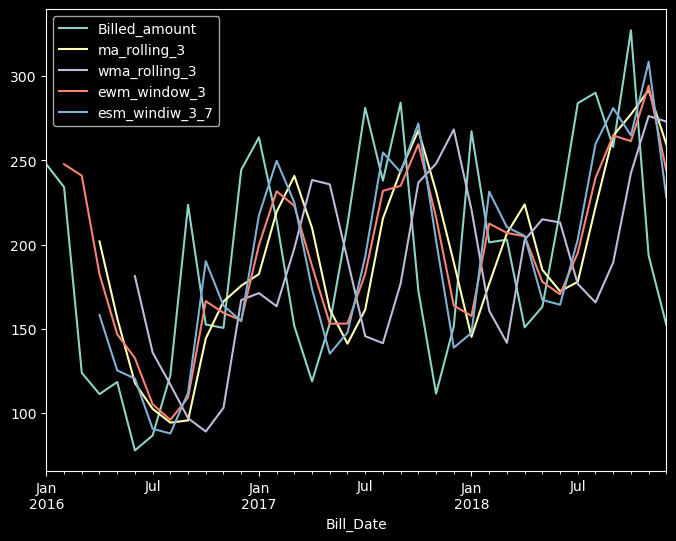

In [26]:
bill_2018.plot()

In [28]:
# with alpha=0.3
bill_2018['esm_windiw_3_3'] = bill_2018['Billed_amount'].ewm(alpha = 0.3 , adjust = False ,min_periods = 3).mean().shift(1)

<AxesSubplot: xlabel='Bill_Date'>

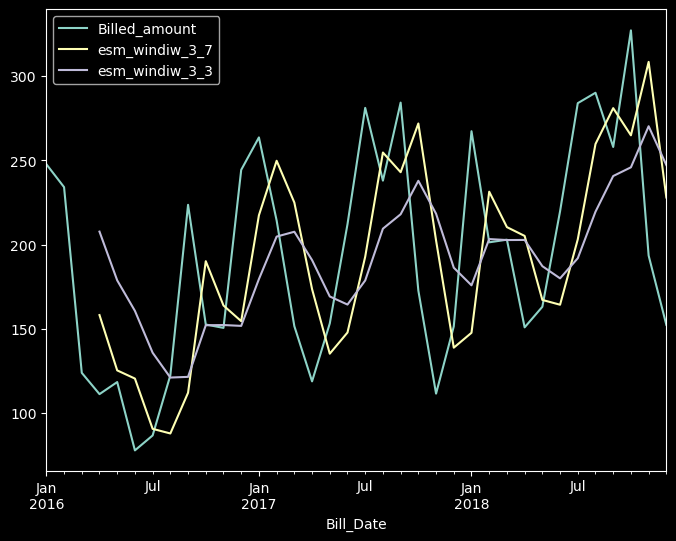

In [29]:
bill_2018[['Billed_amount','esm_windiw_3_7','esm_windiw_3_3']].plot()

<AxesSubplot: xlabel='Bill_Date'>

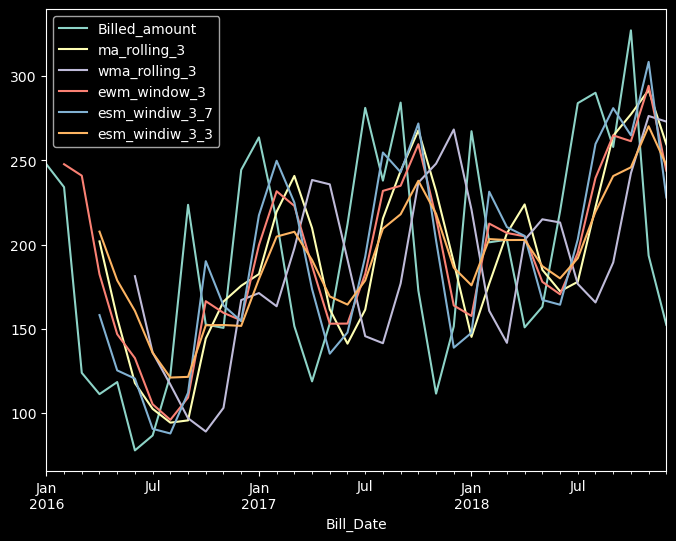

In [30]:
bill_2018.plot()

# 5. Evaluation

In [31]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [32]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

85.25608726256783

In [33]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

64.32131239414655

In [34]:
((bill_2018['Billed_amount']-bill_2018['esm_windiw_3_7'])**2).mean()**0.5

61.26408398853503

In [35]:
((bill_2018['Billed_amount']-bill_2018['esm_windiw_3_3'])**2).mean()**0.5

65.22424423118377

# Conclusion:
* For This dataset EMA with alpha=0.7 is best for prediction